# Applying PCA & kNN on Retail data for customer segmentation
## About the dataset:
Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

## Your tasks:
## Please implement it in the following oder:
1. Load and explore the dataset: 
    - Count number of purchases by customer ID
    - Plot 10 most-purchasing customers(barplot)
2. Split data into train- and testset(80%/20% ratio)
2. EDA:
    - Use data to build the following new features which we will use for clustering - NOTE: per userID(user ID = row, columns/features = the following):
        1. Monetary: Total amount(revenue contributed) of transactions: 
                -userpurchases(amount) * unit price
        2. Frequency: Number of transactions
                - count number of user purchases
    - Remove outliers with the given function
    - Mean-center and standardize the data
    - Apply PCA on the data and extract the first two components
    - Plot the projection of the dataset on this 2 components
3. Apply kNN on the dataset:
    - Apply PCA and extract the first two components
    - Cluster the data
    - Scatterplot the data and color each point depending on its cluster
    - Try to use different numbers of clusters centres k

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data = pd.read_csv('data/OnlineRetail.csv', encoding='latin')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data = data.dropna()

In [5]:
# Changing the datatype of Customer Id as per Business understanding
data['CustomerID'] = data['CustomerID'].astype(str)

In [6]:
# Monetary feature
data['Amount'] = data['Quantity']*data['UnitPrice']
feature_mon = data.groupby('CustomerID')['Amount'].sum()
feature_mon = feature_mon.reset_index()
feature_mon.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [7]:
# Frequency feature
feature_freq = data.groupby('CustomerID')['InvoiceNo'].count()
feature_freq = feature_freq.reset_index()
feature_freq.columns = ['CustomerID', 'Frequency']
feature_freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [8]:
new_df = pd.merge(feature_mon, feature_freq, on='CustomerID', how='inner')
new_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [9]:
final_data = new_df[['Amount', 'Frequency']]

In [10]:
# Rescale the attributes

scaler = StandardScaler()

final_data = scaler.fit_transform(new_df)
final_data.shape

(4372, 3)

In [12]:
model = KMeans(n_clusters=4, max_iter = 10)

In [13]:
model.fit(final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
model.labels_.shape

(4372,)

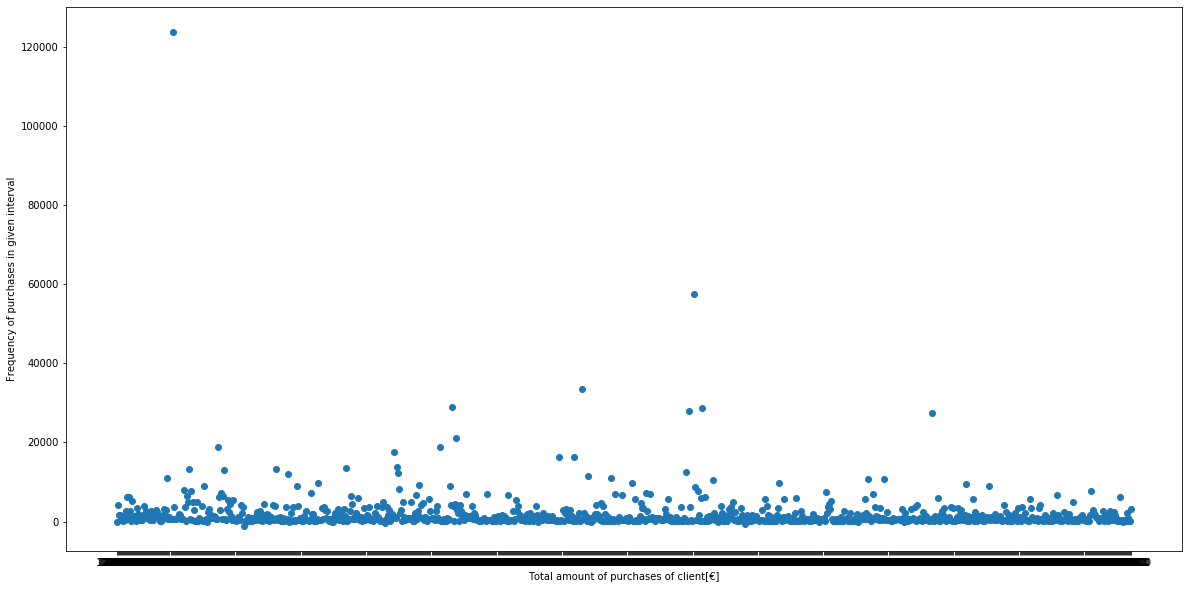

In [22]:
fig = plt.figure(figsize=(20,10))
plt.scatter(new_df.iloc[:1000,0], new_df.iloc[:1000,1])
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

In [30]:
from scipy import stats

def remove_outliers(df, thresh):
    z_scores = stats.zscore(df)
    return z_scores
    
scores = remove_outliers(final_data, 3)

In [31]:
scores.shape

(4372, 3)